In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


### Importing pandas,matplotlib and seaborn. And adding data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
adult=pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Finding percentage of null values in each column

In [3]:
for col in adult.columns:
    c=(adult[col].isnull().sum()/adult.shape[0])*100
    print(col,c)

age 0.0
workclass 0.0
fnlwgt 0.0
education 0.0
educational-num 0.0
marital-status 0.0
occupation 0.0
relationship 0.0
race 0.0
gender 0.0
capital-gain 0.0
capital-loss 0.0
hours-per-week 0.0
native-country 0.0
income 0.0


### Finding the columns whose data type is object that means columns which are categoricals

In [4]:
s=(adult.dtypes=='object')
categorical=list(s[s].index)
categorical


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [5]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# for cols in categorical:
#     adult[cols]=encoder.fit_transform(adult[cols])

### finding correlations all non categorical data

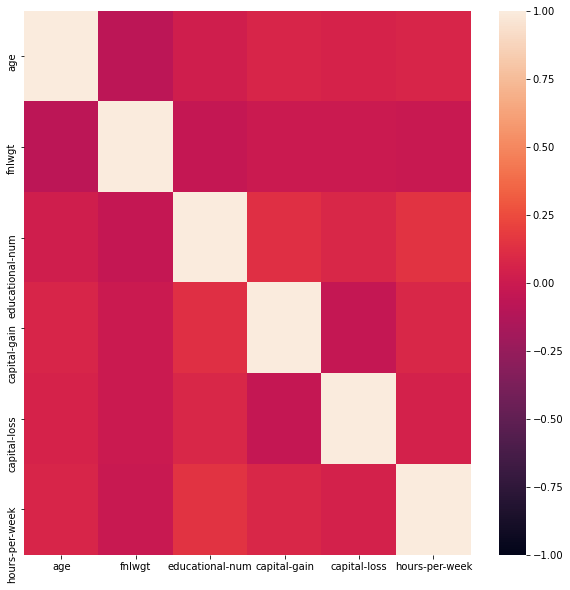

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
sns.heatmap(adult.corr(),vmin=-1)
plt.show()

### converting output data to binary form if income <=50k :0 and if income>50k :1

In [7]:
adult[adult.columns[14]]=pd.Categorical(adult[adult.columns[14]]).codes
adult[adult.columns[14]]

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int8

### finding list of non-categorical columns name

In [8]:
w=(adult.dtypes!='object')
not_cat=list(w[w].index)[:6]
not_cat

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### scaling-down the non-categorical features

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
adult[not_cat]=scaler.fit_transform(adult[not_cat])

In [10]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,0.145129,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,0
1,0.287671,Private,0.052451,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,0
2,0.150685,Local-gov,0.219649,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,1
3,0.369863,Private,0.100153,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,1
4,0.013699,?,0.061708,Some-college,0.600000,Never-married,?,Own-child,White,Female,0.000000,0.0,0.295918,United-States,0


In [11]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,0.120004,0.605206,0.010791,0.020088,0.402269,0.239282
std,0.187815,0.071445,0.171398,0.074521,0.092517,0.126443,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071216,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.273973,0.112210,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,0.152462,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### univariate annalysis of work-class


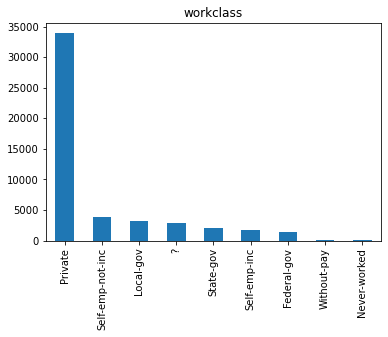

In [12]:
count=adult[adult.columns[1]].value_counts()
count.plot.bar(title=adult.columns[1])

### Bivariate annalysis of work-class and output

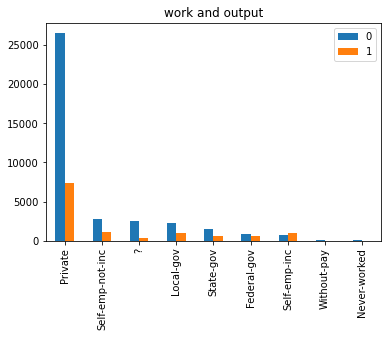

In [13]:
work_output=pd.DataFrame()
work_output[0]=adult[adult[adult.columns[14]]==0][adult.columns[1]].value_counts()
work_output[1]=adult[adult[adult.columns[14]]==1][adult.columns[1]].value_counts()
work_output.plot.bar(title="work and output")
# for p in w_o.patches:
#     w_o.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

### checking percentage of work-class  for each type as output as 1 out of total output

In [14]:
val=((work_output[1]/(work_output[0]+work_output[1]))*100)
print(val)
print(adult[adult.columns[1]].unique())

Private             21.786704
Self-emp-not-inc    27.887105
?                    9.467667
Local-gov           29.559949
State-gov           26.754165
Federal-gov         39.175978
Self-emp-inc        55.339233
Without-pay          9.523810
Never-worked              NaN
dtype: float64
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


### Assigning values to the categorical data according to how it effects the income

In [15]:
adult[adult.columns[1]]=pd.Categorical(adult[adult.columns[1]],categories=[adult[adult.columns[1]].unique()[8],adult[adult.columns[1]].unique()[7],adult[adult.columns[1]].unique()[5],adult[adult.columns[1]].unique()[1],adult[adult.columns[1]].unique()[2],adult[adult.columns[1]].unique()[0],adult[adult.columns[1]].unique()[4],adult[adult.columns[1]].unique()[3],adult[adult.columns[1]].unique()[6]],ordered=True).codes
adult.describe()

,age,workclass,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,4.981430,0.120004,0.605206,0.010791,0.020088,0.402269,0.239282
std,0.187815,1.161373,0.071445,0.171398,0.074521,0.092517,0.126443,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,5.000000,0.071216,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.273973,5.000000,0.112210,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,5.000000,0.152462,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Education vs output

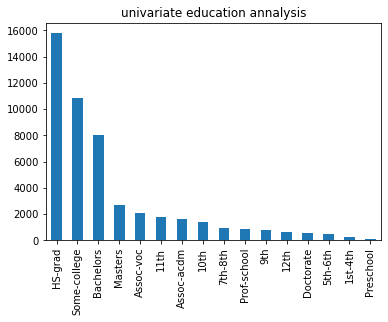

In [16]:
count1=adult[adult.columns[3]].value_counts()
count1.plot.bar(title="univariate education annalysis")

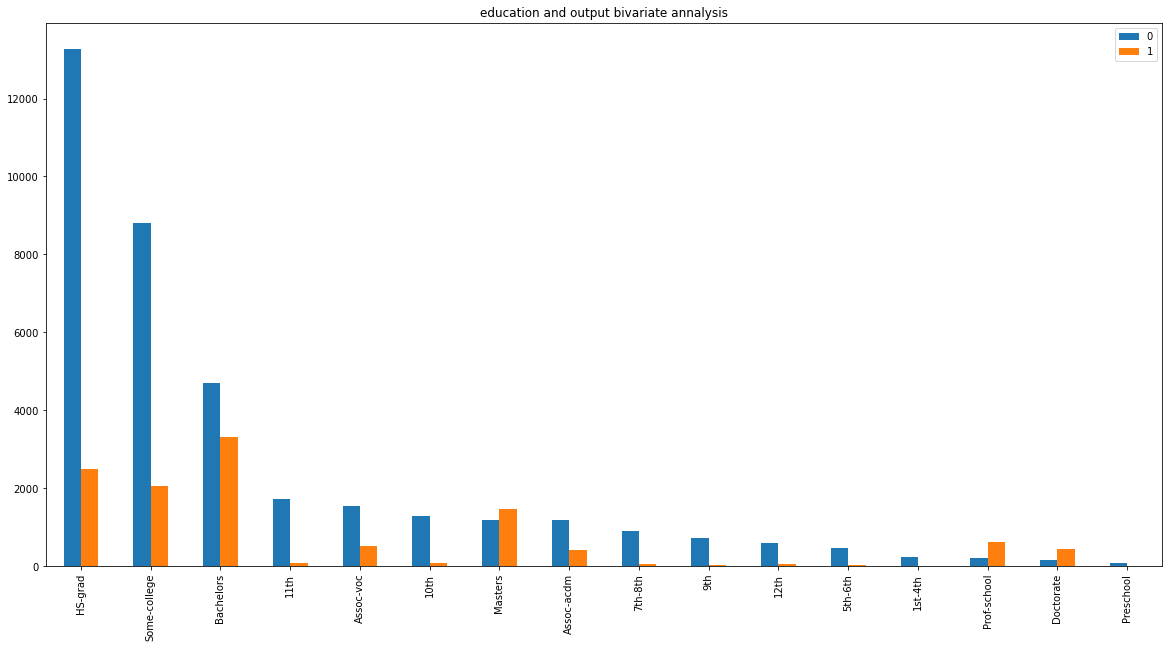

In [17]:
eo=pd.DataFrame()
eo[0]=adult[adult[adult.columns[14]]==0][adult.columns[3]].value_counts()
eo[1]=adult[adult[adult.columns[14]]==1][adult.columns[3]].value_counts()
eo.plot.bar(title="education and output bivariate annalysis",figsize=(20,10))

### checking percentage of education  for each type as output as 1 out of total output

In [18]:
ch=(eo[1]/(eo[1]+eo[0]))*100
print(ch)
print(adult[adult.columns[3]].unique())

HS-grad         15.857831
Some-college    18.964883
Bachelors       41.283489
11th             5.077263
Assoc-voc       25.327511
10th             6.263499
Masters         54.911554
Assoc-acdm      25.796377
7th-8th          6.492147
9th              5.423280
12th             7.305936
5th-6th          5.304519
1st-4th          3.238866
Prof-school     73.980815
Doctorate       72.558923
Preschool        1.204819
dtype: float64
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


### Assigning values to the categorical data according to how it effects the income

In [19]:
adult[adult.columns[3]]=pd.Categorical(adult[adult.columns[3]],categories=[" Preschool", " 1st-4th" ," 5th-6th"," 11th" ," 9th"," 7th-8th",
                                                                           " 10th"," 12th"," HS-grad"," Some-college"," Assoc-acdm"," Assoc-voc",
                                                                           " Bachelors"," Masters"," Prof-school"," Doctorate"
                                                                          ],ordered=True).codes

In [20]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,5,0.145129,-1,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,0
1,0.287671,5,0.052451,-1,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,0
2,0.150685,3,0.219649,-1,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,1
3,0.369863,5,0.100153,-1,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,1
4,0.013699,4,0.061708,-1,0.600000,Never-married,?,Own-child,White,Female,0.000000,0.0,0.295918,United-States,0


# occupation column annalysis


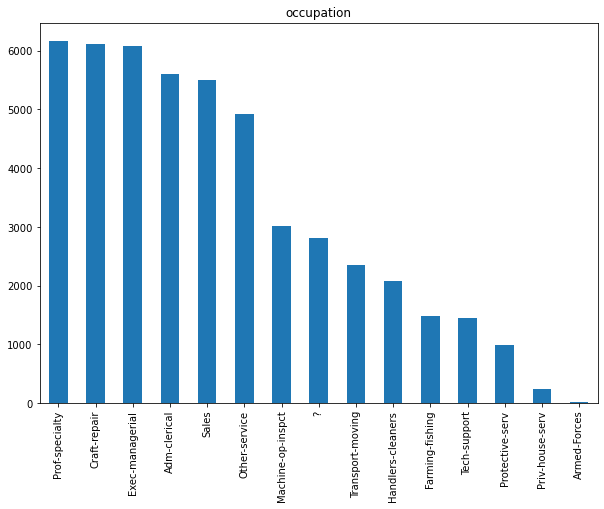

In [21]:
count2=adult[adult.columns[6]].value_counts()
count2.plot.bar(title="occupation",figsize=(10,7))

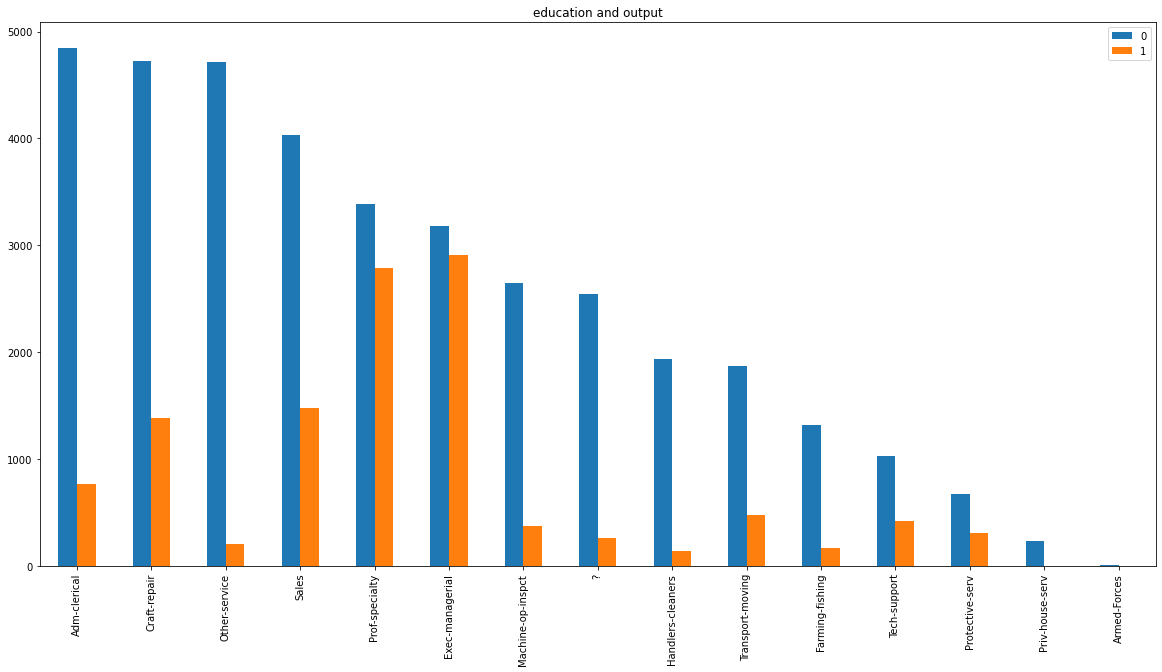

In [22]:
occup=pd.DataFrame()
occup[0]=adult[adult[adult.columns[14]]==0][adult.columns[6]].value_counts()
occup[1]=adult[adult[adult.columns[14]]==1][adult.columns[6]].value_counts()
occup.plot.bar(title="education and output",figsize=(20,10))
# occup.plot.bar(title="occupation and output")
#adult[adult.columns[1]].unique()[4]

### checking percentage of occupation  for each type as output as 1 out of total output

In [23]:
p1=(occup[1]/(occup[0]+occup[1]))*100
d=p1.sort_values().index
d

Index(['Priv-house-serv', 'Other-service', 'Handlers-cleaners', '?',
       'Farming-fishing', 'Machine-op-inspct', 'Adm-clerical',
       'Transport-moving', 'Craft-repair', 'Sales', 'Tech-support',
       'Protective-serv', 'Armed-Forces', 'Prof-specialty', 'Exec-managerial'],
      dtype='object')

### Assigning values to the categorical data according to how it effects the income

In [24]:
adult[adult.columns[6]]=pd.Categorical(adult[adult.columns[6]],categories=d,ordered=True).codes
adult.describe()

,age,workclass,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,48842.000000,48842.000000,48842.0,48842.000000,48842.00000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,4.981430,0.120004,-1.0,0.605206,7.74006,0.010791,0.020088,0.402269,0.239282
std,0.187815,1.161373,0.071445,0.0,0.171398,4.21529,0.074521,0.092517,0.126443,0.426649
min,0.000000,0.000000,0.000000,-1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,5.000000,0.071216,-1.0,0.533333,5.00000,0.000000,0.000000,0.397959,0.000000
50%,0.273973,5.000000,0.112210,-1.0,0.600000,8.00000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,5.000000,0.152462,-1.0,0.733333,13.00000,0.000000,0.000000,0.448980,0.000000
max,1.000000,8.000000,1.000000,-1.0,1.000000,14.00000,1.000000,1.000000,1.000000,1.000000


In [25]:
adult.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,5,0.145129,-1,0.400000,Never-married,5,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,0
1,0.287671,5,0.052451,-1,0.533333,Married-civ-spouse,4,Husband,White,Male,0.000000,0.0,0.500000,United-States,0
2,0.150685,3,0.219649,-1,0.733333,Married-civ-spouse,11,Husband,White,Male,0.000000,0.0,0.397959,United-States,1
3,0.369863,5,0.100153,-1,0.600000,Married-civ-spouse,5,Husband,Black,Male,0.076881,0.0,0.397959,United-States,1
4,0.013699,4,0.061708,-1,0.600000,Never-married,3,Own-child,White,Female,0.000000,0.0,0.295918,United-States,0
5,0.232877,5,0.126112,-1,0.333333,Never-married,1,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,0
6,0.164384,4,0.145280,-1,0.533333,Never-married,3,Unmarried,Black,Male,0.000000,0.0,0.397959,United-States,0
7,0.630137,7,0.062472,-1,0.933333,Married-civ-spouse,13,Husband,White,Male,0.031030,0.0,0.316327,United-States,1
8,0.095890,5,0.241782,-1,0.600000,Never-married,1,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,0
9,0.520548,5,0.062722,-1,0.200000,Married-civ-spouse,8,Husband,White,Male,0.000000,0.0,0.091837,United-States,0


# dealing with large number of unique value of country 

In [26]:
adult[adult.columns[13]].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [27]:
adult[adult.columns[13]]=adult[adult.columns[13]].replace("United-States",1)
adult[adult.columns[13]]=adult[adult.columns[13]].replace(adult[adult.columns[13]].unique()[1:],0)

# adult[adult[adult.columns[13]]==" United-States"][adult.columns[13]]=0
# adult.iloc[(adult[adult.columns[13]]!=" United-States"),adult.columns[13]]=0
adult[adult.columns[13]]

0        1
1        1
2        1
3        1
4        1
        ..
48837    1
48838    1
48839    1
48840    1
48841    1
Name: native-country, Length: 48842, dtype: int64

In [28]:
print(adult[adult.columns[13]].value_counts())
adult.head()

1    43832
0     5010
Name: native-country, dtype: int64


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,5,0.145129,-1,0.400000,Never-married,5,Own-child,Black,Male,0.000000,0.0,0.397959,1,0
1,0.287671,5,0.052451,-1,0.533333,Married-civ-spouse,4,Husband,White,Male,0.000000,0.0,0.500000,1,0
2,0.150685,3,0.219649,-1,0.733333,Married-civ-spouse,11,Husband,White,Male,0.000000,0.0,0.397959,1,1
3,0.369863,5,0.100153,-1,0.600000,Married-civ-spouse,5,Husband,Black,Male,0.076881,0.0,0.397959,1,1
4,0.013699,4,0.061708,-1,0.600000,Never-married,3,Own-child,White,Female,0.000000,0.0,0.295918,1,0


In [29]:
adult.describe()

,age,workclass,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.0,48842.000000,48842.00000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,4.981430,0.120004,-1.0,0.605206,7.74006,0.010791,0.020088,0.402269,0.897424,0.239282
std,0.187815,1.161373,0.071445,0.0,0.171398,4.21529,0.074521,0.092517,0.126443,0.303407,0.426649
min,0.000000,0.000000,0.000000,-1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,5.000000,0.071216,-1.0,0.533333,5.00000,0.000000,0.000000,0.397959,1.000000,0.000000
50%,0.273973,5.000000,0.112210,-1.0,0.600000,8.00000,0.000000,0.000000,0.397959,1.000000,0.000000
75%,0.424658,5.000000,0.152462,-1.0,0.733333,13.00000,0.000000,0.000000,0.448980,1.000000,0.000000
max,1.000000,8.000000,1.000000,-1.0,1.000000,14.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### one-hot encodings to categorical data

In [30]:
t=(adult.dtypes==object)
a=list(t[t].index)
a

['marital-status', 'relationship', 'race', 'gender']

In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
po=pd.DataFrame(encoder.fit_transform(adult[a]))

In [32]:
adult.drop(a,inplace=True,axis=1)

In [33]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,5,0.145129,-1,0.400000,5,0.000000,0.0,0.397959,1,0
1,0.287671,5,0.052451,-1,0.533333,4,0.000000,0.0,0.500000,1,0
2,0.150685,3,0.219649,-1,0.733333,11,0.000000,0.0,0.397959,1,1
3,0.369863,5,0.100153,-1,0.600000,5,0.076881,0.0,0.397959,1,1
4,0.013699,4,0.061708,-1,0.600000,3,0.000000,0.0,0.295918,1,0


In [34]:
data=pd.concat([adult,po],axis=1)

data.head()

,age,workclass,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,...,10,11,12,13,14,15,16,17,18,19
0,0.109589,5,0.145129,-1,0.400000,5,0.000000,0.0,0.397959,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.287671,5,0.052451,-1,0.533333,4,0.000000,0.0,0.500000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.150685,3,0.219649,-1,0.733333,11,0.000000,0.0,0.397959,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.369863,5,0.100153,-1,0.600000,5,0.076881,0.0,0.397959,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.013699,4,0.061708,-1,0.600000,3,0.000000,0.0,0.295918,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### As value_counts of output is not equal StratifiedShuffleSplit is used for train test splits

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
splits=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in splits.split(data,data[data.columns[10]]):
    train_data=data.iloc[train_index]
    test_data=data.iloc[test_index]
y_train=train_data[train_data.columns[10]]
y_test=test_data[test_data.columns[10]]
x_train=pd.concat([train_data.iloc[:,:10],train_data.iloc[:,11:]],axis=1)
x_test=test_data.drop(test_data.columns[10],axis=1)


# Selecting best model 

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(tol=0.01)
model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(tol=0.01)

In [37]:
from sklearn.metrics import classification_report
print('classification report for test_data in logistic regression \n',classification_report(y_test,model.predict(x_test)))

classification report for test_data in logistic regression 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      7431
           1       0.73      0.57      0.64      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [38]:

print('classification report for train_data in logistic regression \n',classification_report(y_train,model.predict(x_train)))

classification report for train_data in logistic regression 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     29724
           1       0.71      0.58      0.64      9349

    accuracy                           0.84     39073
   macro avg       0.79      0.75      0.77     39073
weighted avg       0.83      0.84      0.84     39073



In [39]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(max_depth=7)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=7)

In [40]:
from sklearn.metrics import classification_report
print('classification report for test_data in RandomForestClassification \n',classification_report(y_test,model1.predict(x_test)))

classification report for test_data in RandomForestClassification 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      7431
           1       0.82      0.54      0.65      2338

    accuracy                           0.86      9769
   macro avg       0.85      0.75      0.78      9769
weighted avg       0.86      0.86      0.85      9769



In [41]:

print('classification report for train_data in RandomForestClassification \n',classification_report(y_train,model1.predict(x_train)))

classification report for train_data in RandomForestClassification 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     29724
           1       0.81      0.53      0.64      9349

    accuracy                           0.86     39073
   macro avg       0.84      0.75      0.78     39073
weighted avg       0.85      0.86      0.85     39073



In [42]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=7)
model2.fit(x_train,y_train)
print('classification report for test_data in DecisionTreeClassification \n',classification_report(y_test,model1.predict(x_test)))

classification report for test_data in DecisionTreeClassification 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      7431
           1       0.82      0.54      0.65      2338

    accuracy                           0.86      9769
   macro avg       0.85      0.75      0.78      9769
weighted avg       0.86      0.86      0.85      9769



In [43]:

print('classification report for train_data in DecisionTreeClassification \n',classification_report(y_train,model2.predict(x_train)))

classification report for train_data in DecisionTreeClassification 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     29724
           1       0.79      0.54      0.64      9349

    accuracy                           0.86     39073
   macro avg       0.83      0.75      0.78     39073
weighted avg       0.85      0.86      0.85     39073



In [44]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:

print('classification report for test_data in KNeighborsClassification \n',classification_report(y_test,model3.predict(x_test)))

classification report for test_data in KNeighborsClassification 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7431
           1       0.66      0.56      0.60      2338

    accuracy                           0.83      9769
   macro avg       0.76      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [46]:

print('classification report for train_data in KNeighborsClassification \n',classification_report(y_train,model3.predict(x_train)))

classification report for train_data in KNeighborsClassification 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     29724
           1       0.78      0.67      0.72      9349

    accuracy                           0.87     39073
   macro avg       0.84      0.80      0.82     39073
weighted avg       0.87      0.87      0.87     39073



# conclusion:-
### After annalysing different model we can conclude that RandomForestClassifier works well in this case as we could observe that accuracy is high as well as f1 scores for each categories are greater as compared with other models 